# Image Processing and Analysis with ImageJ

Jan Eglinger

![FMI](http://www.fmi.ch/img/logo-FMI-grey.gif)

<small>Friedrich Miescher Institute for Biomedical Research (FMI)
Basel, Switzerland</small>


Fribourg, March 14 - 15, 2018


## Agenda

* Introduction to ImageJ / Basics of Image Processing
* Image Filtering
* Image Segmentation
* Batch Processing


#### Note

The following code cell serves to initialize some utility functions that are used in the later cells of this notebook.
In order to interactively run the code in this presentation, you'll have to run the cell by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>

In [54]:
/* SciJava Script Parameters */
#@ OpService ops

/* Required Imports */
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.interpolation.randomaccess.FloorInterpolatorFactory

/* Utility Functions */
def table_image(array) {
    img = ops.create().kernel(array as double[][], new FloatType())

    return ops.run("transform.scaleView", img,
        [32,32] as double[],
        new FloorInterpolatorFactory()
    )    
}


### Image Processing Fundamentals

* Digital images
* Resolution
* Bit depth
* Histograms
* Color representation


#### Digital images

A digital image is just an array of numbers:

|   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|
| 0 | 0 | 1 | 1 | 1 | 0 | 0 |
| 0 | 1 | 2 | 2 | 2 | 1 | 0 |
| 1 | 2 | 1 | 1 | 1 | 2 | 1 |
| 1 | 2 | 1 | 1 | 1 | 2 | 1 |
| 1 | 2 | 1 | 1 | 1 | 2 | 1 |
| 0 | 1 | 2 | 2 | 2 | 1 | 0 |
| 0 | 0 | 1 | 1 | 1 | 0 | 0 |



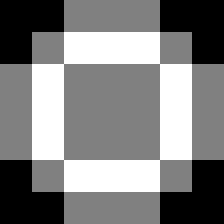

In [55]:
table = [
    [ 0, 0, 1, 1, 1, 0, 0],
    [ 0, 1, 2, 2, 2, 1, 0],
    [ 1, 2, 1, 1, 1, 2, 1],
    [ 1, 2, 1, 1, 1, 2, 1],
    [ 1, 2, 1, 1, 1, 2, 1],
    [ 0, 1, 2, 2, 2, 1, 0],
    [ 0, 0, 1, 1, 1, 0, 0]
]

table_image(table)

#### Resolution

Optical resolution vs. Spatial sampling

Intensity sampling


### Bit depth

example


**Image Types in ImageJ**

|  Type  |   Range   |
|--------|-----------|
|  8-bit |  0 - 255  |
| 16-bit | 0 - 65535 |


#### Dimensions

xyzct


#### Color information

example


Exercise ?

### ImageJ / Fiji basics

* Toolbar / Statusbar
* Hyperstack
* Search bar


#### Exercises

* What's wrong with these sample images?
* How many implementations of Mean Filter are there? What's their difference?


### Filtering

* Kernel / Convolution
* Mean filter
* Gauss filter

* Non-linear filtering: min/max
* => Binary Morphology


#### Linear filtering - Exercise

* Create a Mean filter with radius 10; what are the kernel dimensions?

#### Morphological operations - Exercise

* Find all vertical lines in the image

### Segmentation

* ROIs
* Masks
* Threshold
* Watershed
* Skeletonization


#### Exercise

* Measure length of larvae

### Batch processing

* Macro recorder
* Make your code generic
* Process > Batch > Macro...
* Script editor



In [1]:

#@ IOService io

println io



org.scijava.io.DefaultIOService [priority = 0.0]


In [16]:
#@ IOService io
#@ OpService ops
#@output original
#@output result2bit

original = io.open("images/nucleus.png")

temp = ops.run("convert.float", original)
temp2 = ops.run("eval", "image / 32", ["image": temp])
floorOp = ops.op("floor", temp2.firstElement(), temp2.firstElement())
floatImage = ops.run("create.img", temp)
ops.run("map", floatImage, temp2, floorOp)
temp3 = ops.run("eval", "image * 32", ["image": floatImage])

result2bit = ops.run("convert.uint8", temp3)


Key Value original <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAAA/J0lEQVR42p2dUxAsS/Z3e2zbtm3btm3btm3btm3bRszbRMx7/b9VcVfHOvvWOXfme6jo7uqqrKzc+m1k5u54xzvecvzjH3854QlPuJzoRCdaTn7yky8nPvGJF89z7gQnOMFyrGMdaznSkY60HPe4x12Ofexjr7+Pecxjrge/uZ6D/zl3tKMdbTnGMY6x/qZtDtrh93GOc5z1GtrgGSc5yUnW557iFKdYn805r+Pgu8+lnZOd7GTLKU95yuXUpz71ei/P9Zlcz2/On/a0p11Od7rTrdfzHpzjO9dwrc/nmf530pOedH0W/x/5yEde34F+cw195Dra4vC5Rz3qUdfrfH8++Z+2vIY2TnOa06zP3u1263GUoxxlvY/nMLa0w3mezX1cyzmusw3a55N+c69teR+ftHX0ox99/7sHbfG8/TkGlYf4UInNA3kYg3KqU51qJQ4vz3cGn8HgWjphByU+HZdQ3McnAyiT8UwOzkl0zvNS3Mtv7+E62uQ/2+M7feQ/Gch+y0gMNkeZimsgigzJd9qUqPzmHtqQyHz3XWlfJpNpuIb35j/Hgf/pG2Mjk3G/7yJD0QfvkwYQh3My/CQi90tcCD0JfEQHbR9wjgdKDCSKTtsZHqS02xGu53/P2xk1gdK6pRG4j5fnxRk8DqWNtvzNNXznOrWAhIYBHXQO+g3hHFCZQSJwDfdy0B8YQulV86jxuN771G5qIJmWfvZctZT/2zfuVwvK3Iwf5x0fGUVmUTPalgLGfXwejOj83+Ng19D+Af8zGEqbateOQFwOO+DD+a2aU3r9zuCrvtqWB/9zKPG0T5u8qPdLSH5XPUMsJFS1r3mxD0qZkkTbnFMrwCgcmiDa8N1lZvph30sEmdD/5jUSjcN3mMTl0FzIKB0nGZZP+lJB5B6FSCJDD2jRaxxvzYkH16q9DvhPFceDOeFAqtZsXGlTvXOPpsE2VM9yt8RWSrlGtUebmg1tWvGCKppnoJmw5xyqZwet2mZKpv3EZIkD+F+tpVZRI0hkGbpjUS1iP72X5ykkNWHcq0RLYJ9T3MRvNS+/+V5h8/7iDJmE9+jhORll4g36w/c9A/AgB4uGvbCcyaeawoPr58s4WBJF2ycAUz3L+WoRwRffadeB1hQo/VyjevdlxAEyjYxYojuoDIqDJx7wGvtRQMyzuUaNw1j46ZgoFA64WkesIfPYP8dA4vuuEoZrVNOCOcdUBpcZJpGnxMuUmu0tULgTWEhw/xAXaFvtqLa5CHQyTb2EqbZ4AVU5nzIJ7UI4B0c7PNVrz9NW0T3toS0EqpyfzOT1agYJwnl+V3t5XbUH/2mLte9qHJ7FefqmGdhqp9rK/inRNWNiMDUk9/wvwI9+ekADze0Bhy/Gy3gBnxJbyVQb9Hob57uSWGBT3CADMCi6cHI77SoddRcltrbRgXBwlUC1y2TYmh+YQvygNM5rua73qZF8nhhFFaqL6D0QWJU9GWnio0q0guO7ihsUzAoE47nFBEp5pV8XUgBZT2N/r2qKQxQuIQt2lGhVv9JoB1VncqqgBWZSIgoadUdUy6rBErIYAgKe/vSn37uVum+CV3FF+6ppE+XL2ALbonzOywzeY7xA18z/lSa9Ek2TglJz6Jjo7pXoElWCC/w8ZALfjfunR1Lt2HYdf5mFz01zIShSin0JO+F/SrzXlWuLdP3Ow7nOQWJA1AAykYPTwI/gsC5lpUy7rY31fuMV5z73uZcznOEMexDG8zULHFxbb6CaTuJPnKO2aVBMZlNDFCQWGxi8UptoKmVava0tqRZr1HY3zqB5ralUoPUEpgd3OBA4QQ0vUYQpISpVEk+ilQG0cVNyDBo5EKp8Cao6VuodVDWRL2hf24fiAwGfKk9Pw74yELp/aBOYg2ghNtr77Zf2uNLlAMtcjTvIwP7vp3EKmUSGUHP6jjKVku87ynCNufScWmBqkDLAQbGCg24kbKL0Rq3ojNI5TYPnHBAxgBHGaTp0t0TZMp82XTNQO2w7gj5sOgQUPG6FWRtKliC6sLqXtEPbmqQKQ8dBhtANtO8VgsYB+B+8Q/t6GILQxi6qXepxVNX7XN9Jk+mhFhELNCZwyKihL+EAaw9FtVXZNRczauXgyrV1Dxv563kHpM9obkL0LGLvAQEhHuoeCeY319O3mgQ9Agl+xjOecQ8GizHEJA0uqQ3ryvnuSrZxAN6rwtJQOM/2GWoRCS6z+CwxjTZfLWzbMqOaTnqo1jWhNdEzKCSjr/eo0swJNAwqgRt/rkosd9ZWVoXL4SZwjMgpAarb+tvVPP4nIyiZmoNqEts0FwCDyABKIr/pp+rSELSg0+toQ0JUzVaNS2yFpRHVBqMaFdR9bfBLiWd81cISlXMG4Zq30GRo5tQAJuHEYVX/9cj2yaJyzMzqea6Ic6psmUGiNUPXgTCxosrewgLG5av6a+cLcgRAInsTSzKiBBW/VJU3wqnZkZgynZ6KeYr2tdFOCes7TmI32KNmLCissDQcbjBIoZTxqnV066TRDB8brzCrqYk087hqhmYBHcjapAZSHKBiggY0lGhtlVIjgyk5ZbAyD/8bMCmjlQGMCBZ90x8kF1PQAMzWc2TcRij7LjJUiSNzaWamG1wT4P81n8UEjV3U1Kk97Ju4oi407RrhFI85tsYI1BpGCmUAQeXMJezsjKDCQasGkHimZxvpqwdBO80aOii6MqpcXcfGEXymXoGMIMFrCrTpjQVIoNp87b6Hkb+21/SwzCl+KDNqYmhDxtO0GX7mGW1PYdIel9gS1PC1tQtTI9Ge//FsYiE+p1FXVb3SrQaYySDdxz0orHthI2oFuayZJwssVM1yp7awLkgBozECtYJcWztWF6x2vxpBhutzq4EYLLUG99BfzlmcUUxiuwVuehYWf9gXNaJMVxe2bXBvC2rUXr4boNWiE6Xd6wzGCX6nxpDJHIeq+C2Uz/+aeGncDO96XTNqqu4mWWZOX9sjR4l2HTBBXm1cYwYz+lb3zJoE1VwBanPklSYJoQlQm3GNBR66YUo413CuHkQlfBLZ//p/8yMylFpDwZnaTYIrDJo8D7VHcVA9q4NVIjX653jVQ1DjChSbI9gVrQtsmgNXZQluKrlWDKliTQ23+kfJarpXju7gVvUblZNpJtKv+va3GcDaVvtWz6Np5noKmo5qBvsztZDEkbiCM8ehIeGaFhlfqeR8K6Z8zwbFmmBrgEkGa+DMvggIS+g9wQ/TDGqDXTNNSr3cpV+qdFtRI3DS7jdEal66uX6RbV+wHN5ClDKLL8QzdM9mKLgROc5DUAdVppiM4m8HTs3lvd7fuINMoFCIM7aYsP769Jj8lAHEA4K+jk1D5Q2F12R5rUyhSRXoGRHV79cseOwmCq/kFaS1Nq+Zq6ZojaI1KNJAU8OcM8Wr1lHCmrWrJpmmiXNKM8eZznSmvR/f2IASqpbSvMxys4K/Kf1KqVFIDrWGILTJNb0qJdwxaUWS41NmnlVWaiUjmMZDyihWG7U6qPmU1hAcUDAyOUyOVW0p1c0ra3tMHonMDcD4Xc2hX8t9da+UGqt9eq+SVxVZNWn/+C4DqPInEtdL4BlqCiVdwtab8HktZCljNk1eV5T3bTJIbNKIJSjeRFXNWttpRZKE75hu5U3MDTQyW9PeJJAp5RU4yrHeOP38qhbLqFrtI2KtHZ2ZugZBBHkSGcIxKAwO34sPpgR6zlI0/WuJRvsWjSptSo81CA4qz9JDcGAlWKuEbEOGKYM0lFu0bpha0yEDcBCKtlK5jCV4U6In8Ct+qUZWQ4svmp1tnmBGBDUFu5YrGwQpYLMDdkpJk+tmWZJtqYroGNdD5DOf+cx7CS0arltS76DxBq/TbgoU1QCc43rd1OKGqvVKVPMKZgUlXEGqUsw76JPzHXMDUb1HLcD/HBKr

In [3]:
[["8 bit": original, "2 bit": result2bit]]

8 bit 2 bit <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAAA/J0lEQVR42p2dUxAsS/Z3e2zbtm3btm3btm3btm3bRszbRMx7/b9VcVfHOvvWOXfme6jo7uqqrKzc+m1k5u54xzvecvzjH3854QlPuJzoRCdaTn7yky8nPvGJF89z7gQnOMFyrGMdaznSkY60HPe4x12Ofexjr7+Pecxjrge/uZ6D/zl3tKMdbTnGMY6x/qZtDtrh93GOc5z1GtrgGSc5yUnW557iFKdYn805r+Pgu8+lnZOd7GTLKU95yuXUpz71ei/P9Zlcz2/On/a0p11Od7rTrdfzHpzjO9dwrc/nmf530pOedH0W/x/5yEde34F+cw195Dra4vC5Rz3qUdfrfH8++Z+2vIY2TnOa06zP3u1263GUoxxlvY/nMLa0w3mezX1cyzmusw3a55N+c69teR+ftHX0ox99/7sHbfG8/TkGlYf4UInNA3kYg3KqU51qJQ4vz3cGn8HgWjphByU+HZdQ3McnAyiT8UwOzkl0zvNS3Mtv7+E62uQ/2+M7feQ/Gch+y0gMNkeZimsgigzJd9qUqPzmHtqQyHz3XWlfJpNpuIb35j/Hgf/pG2Mjk3G/7yJD0QfvkwYQh3My/CQi90tcCD0JfEQHbR9wjgdKDCSKTtsZHqS02xGu53/P2xk1gdK6pRG4j5fnxRk8DqWNtvzNNXznOrWAhIYBHXQO+g3hHFCZQSJwDfdy0B8YQulV86jxuN771G5qIJmWfvZctZT/2zfuVwvK3Iwf5x0fGUVmUTPalgLGfXwejOj83+Ng19D+Af8zGEqbateOQFwOO+DD+a2aU3r9zuCrvtqWB/9zKPG0T5u8qPdLSH5XPUMsJFS1r3mxD0qZkkTbnFMrwCgcmiDa8N1lZvph30sEmdD/5jUSjcN3mMTl0FzIKB0nGZZP+lJB5B6FSCJDD2jRaxxvzYkH16q9DvhPFceDOeFAqtZsXGlTvXOPpsE2VM9yt8RWSrlGtUebmg1tWvGCKppnoJmw5xyqZwet2mZKpv3EZIkD+F+tpVZRI0hkGbpjUS1iP72X5ykkNWHcq0RLYJ9T3MRvNS+/+V5h8/7iDJmE9+jhORll4g36w/c9A/AgB4uGvbCcyaeawoPr58s4WBJF2ycAUz3L+WoRwRffadeB1hQo/VyjevdlxAEyjYxYojuoDIqDJx7wGvtRQMyzuUaNw1j46ZgoFA64WkesIfPYP8dA4vuuEoZrVNOCOcdUBpcZJpGnxMuUmu0tULgTWEhw/xAXaFvtqLa5CHQyTb2EqbZ4AVU5nzIJ7UI4B0c7PNVrz9NW0T3toS0EqpyfzOT1agYJwnl+V3t5XbUH/2mLte9qHJ7FefqmGdhqp9rK/inRNWNiMDUk9/wvwI9+ekADze0Bhy/Gy3gBnxJbyVQb9Hob57uSWGBT3CADMCi6cHI77SoddRcltrbRgXBwlUC1y2TYmh+YQvygNM5rua73qZF8nhhFFaqL6D0QWJU9GWnio0q0guO7ihsUzAoE47nFBEp5pV8XUgBZT2N/r2qKQxQuIQt2lGhVv9JoB1VncqqgBWZSIgoadUdUy6rBErIYAgKe/vSn37uVum+CV3FF+6ppE+XL2ALbonzOywzeY7xA18z/lSa9Ek2TglJz6Jjo7pXoElWCC/w8ZALfjfunR1Lt2HYdf5mFz01zIShSin0JO+F/SrzXlWuLdP3Ow7nOQWJA1AAykYPTwI/gsC5lpUy7rY31fuMV5z73uZcznOEMexDG8zULHFxbb6CaTuJPnKO2aVBMZlNDFCQWGxi8UptoKmVava0tqRZr1HY3zqB5ralUoPUEpgd3OBA4QQ0vUYQpISpVEk+ilQG0cVNyDBo5EKp8Cao6VuodVDWRL2hf24fiAwGfKk9Pw74yELp/aBOYg2ghNtr77Zf2uNLlAMtcjTvIwP7vp3EKmUSGUHP6jjKVku87ynCNufScWmBqkDLAQbGCg24kbKL0Rq3ojNI5TYPnHBAxgBHGaTp0t0TZMp82XTNQO2w7gj5sOgQUPG6FWRtKliC6sLqXtEPbmqQKQ8dBhtANtO8VgsYB+B+8Q/t6GILQxi6qXepxVNX7XN9Jk+mhFhELNCZwyKihL+EAaw9FtVXZNRczauXgyrV1Dxv563kHpM9obkL0LGLvAQEhHuoeCeY319O3mgQ9Agl+xjOecQ8GizHEJA0uqQ3ryvnuSrZxAN6rwtJQOM/2GWoRCS6z+CwxjTZfLWzbMqOaTnqo1jWhNdEzKCSjr/eo0swJNAwqgRt/rkosd9ZWVoXL4SZwjMgpAarb+tvVPP4nIyiZmoNqEts0FwCDyABKIr/pp+rSELSg0+toQ0JUzVaNS2yFpRHVBqMaFdR9bfBLiWd81cISlXMG4Zq30GRo5tQAJuHEYVX/9cj2yaJyzMzqea6Ic6psmUGiNUPXgTCxosrewgLG5av6a+cLcgRAInsTSzKiBBW/VJU3wqnZkZgynZ6KeYr2tdFOCes7TmI32KNmLCissDQcbjBIoZTxqnV066TRDB8brzCrqYk087hqhmYBHcjapAZSHKBiggY0lGhtlVIjgyk5ZbAyD/8bMCmjlQGMCBZ90x8kF1PQAMzWc2TcRij7LjJUiSNzaWamG1wT4P81n8UEjV3U1Kk97Ju4oi407RrhFI85tsYI1BpGCmUAQeXMJezsjKDCQasGkHimZxvpqwdBO80aOii6MqpcXcfGEXymXoGMIMFrCrTpjQVIoNp87b6Hkb+21/SwzCl+KDNqYmhDxtO0GX7mGW1PYdIel9gS1PC1tQtTI9Ge//FsYiE+p1FXVb3SrQaYySDdxz0orHthI2oFuayZJwssVM1yp7awLkgBozECtYJcWztWF6x2vxpBhutzq4EYLLUG99BfzlmcUUxiuwVuehYWf9gXNaJMVxe2bXBvC2rUXr4boNWiE6Xd6wzGCX6nxpDJHIeq+C2Uz/+aeGncDO96XTNqqu4mWWZOX9sjR4l2HTBBXm1cYwYz+lb3zJoE1VwBanPklSYJoQlQm3GNBR66YUo413CuHkQlfBLZ//p/8yMylFpDwZnaTYIrDJo8D7VHcVA9q4NVIjX653jVQ1DjChSbI9gVrQtsmgNXZQluKrlWDKliTQ23+kfJarpXju7gVvUblZNpJtKv+va3GcDaVvtWz6Np5noKmo5qBvsztZDEkbiCM8ehIeGaFhlfqeR8K6Z8zwbFmmBrgEkGa+DMvggIS+g9wQ/TDGqDXTNNSr3cpV+qdFtRI3DS7jdEal66uX6RbV+wHN5ClDKLL8QzdM9mKLgROc5DUAdVppiM4m8HTs3lvd7fuINMoFCIM7aYsP769Jj8lAHEA4K+jk1D5Q2F12R5rUyhSRXoGRHV79cseOwmCq/kFaS1Nq+Zq6ZojaI1KNJAU8OcM8Wr1lHCmrWrJpmmiXNKM8eZznSmvR/f2IASqpbSvMxys4K/Kf1KqVFIDrWGILTJNb0qJdwxaUWS41NmnlVWaiUjmMZDyihWG7U6qPmU1hAcUDAyOUyOVW0p1c0ra3tMHonMDcD4Xc2hX8t9da+UGqt9eq+SVxVZNWn/+C4DqPInEtdL4BlqCiVdwtab8HktZCljNk1eV5T3bTJIbNKIJSjeRFXNWttpRZKE75hu5U3MDTQyW9PeJJAp5RU4yrHeOP38qhbLqFrtI2KtHZ2ZugZBBHkSGcIxKAwO34sPpgR6zlI0/WuJRvsWjSptSo81CA4qz9JDcGAlWKuEbEOGKYM0lFu0bpha0yEDcBCKtlK5jCV4U6In8Ct+qUZWQ4svmp1tnmBGBDUFu5YrGwQpYLMDdkpJk+tmWZJtqYroGNdD5DOf+cx7CS0arltS76DxBq/TbgoU1QCc43rd1OKGqvVKVPMKZgUlXEGqUsw76JPzHXMDUb1HLcD/HBKrwLdpYt3

In [4]:
dims = new long[original.numDimensions()]
original.dimensions(dims)

println dims

[128, 128]


In [5]:
#@ ImageJ ij

// Define some handy shorthands!
import net.imglib2.RandomAccessibleInterval
tile = { images ->
  int[] gridLayout = images[0] in List ?
    [images[0].size, images.size] : // 2D images list
    [images.size] // 1D images list
  RandomAccessibleInterval[] rais = images.flatten()
  ij.notebook().mosaic(gridLayout, rais)
}

Script5​$​_run​_closure1​@3a2dc3f2

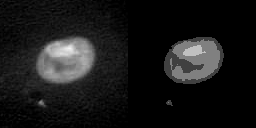

In [7]:
tile([original, result2bit])

In [12]:
#!python

b = (a for a in [1,2])


In [13]:
#!groovy

println b